Enter for the number of years you want the prediction.50
QUESTION NUMBER 1:
 [[ 47.43310201]
 [  9.72986708]
 [  6.62992784]
 [100.92149364]
 [ 30.83151631]
 [ 41.10868861]]

QUESTION NUMBER 2(i):

the percent of female juvenile population is 42.645059746156385 


QUESTION 2(ii) OF PLOTTING GRAPH BETWEEN LOG OF POPULATION VS TIME:



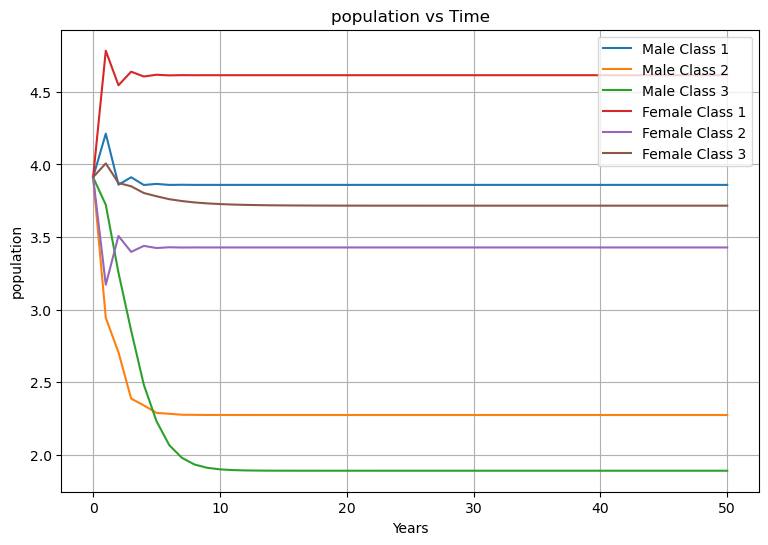

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
P1=7/20
P2=11/50
P3=457/1000
P1f=389/1000
P2f=151/611
P3f=7/10
M12=4/25
M23=37/100
M12f=23/100
M23f=2/5
F2m=1
F2f=2
m1=np.array([P1,0,0,0,F2m,0])
m2=np.array([M12,P2 ,0,0,0,0])
m3=np.array([0,M23,P3,0,0,0])
f1=np.array([0,0,0,P1f,F2f,0])
f2=np.array([0,0,0,M12f,P2f,0])
f3=np.array([0,0,0,0,M23f,P3f])
Les=np.array([m1,
  m2,
  m3,
  f1,
  f2,
  f3])
k=int(input("Enter for the number of years you want the prediction."))
Z=np.array([[k],
             [k],
             [k],
             [k],
             [k],
             [k]])
male_age_groups = [[], [], []]
female_age_groups = [[], [], []]
for i in range(k+1):
    male_age_groups[0].append(np.log(Z[0][0]))
    male_age_groups[1].append(np.log(Z[1][0]))
    male_age_groups[2].append(np.log(Z[2][0]))
    female_age_groups[0].append(np.log(Z[3][0]))
    female_age_groups[1].append(np.log(Z[4][0]))
    female_age_groups[2].append(np.log(Z[5][0]))
    
    Z=np.matmul(Les,Z)
   
print("QUESTION NUMBER 1:\n",Z)

p= Z[3,0]/(Z[0,0]+Z[1,0]+Z[2,0]+Z[3,0]+Z[4,0]+Z[5,0])
z= p*100
print("\nQUESTION NUMBER 2(i):\n")
print("the percent of female juvenile population is",z,"\n")
   

years = list(range(k+1))


plt.figure(figsize=(9, 6))
for i in range(3):
    plt.plot(years, male_age_groups[i], label=f'Male Class {i+1}')
for i in range(3):
    plt.plot(years, female_age_groups[i], label=f'Female Class {i+1}')
plt.xlabel('Years')
plt.ylabel('population')
plt.title('population vs Time')
plt.legend()
plt.grid(True)
print("\nQUESTION 2(ii) OF PLOTTING GRAPH BETWEEN LOG OF POPULATION VS TIME:\n")
plt.show()

In [22]:
def arrange(para): #takes a parameter matrix and arranges it for any all zero rows present.
    nRows = len(para)
    nCols = len(para[0])

    rows = []
    zeRows = []

    for row in para:
        if all(a == 0 for a in row[0:nCols-1]):
            zeRows.append(row)
        else:
            rows.append(row)

    arrangedMatrix = rows + zeRows
    return np.array(arrangedMatrix)

In [23]:
I= np.identity(6)
L=Les-I
c = -1                                    #c stores the position of the last pivot element above
for j in range(6):
    for i in range(6):
        if L[i][j] != 0 and i > c:
            c = i
            
            L[i][:] = L[i][:] / L[i][j]   #deviding by pivot element

            for k in range(6):
                if k != i:                #this check ensures its not subtracting from the same row in which current pivot is.
                    L[k][:] = L[k][:] - L[k][j] * L[i][:]  #L[k][j] is the factor
                        
L = arrange(L)
print(L)

[[ 1.          0.          0.          0.          0.         -1.15384615]
 [ 0.          1.          0.          0.          0.         -0.23668639]
 [ 0.          0.          1.          0.          0.         -0.16127802]
 [ 0.          0.          0.          1.          0.         -2.45499182]
 [ 0.          0.          0.          0.          1.         -0.75      ]
 [ 0.          0.          0.          0.          0.          0.        ]]


In [24]:
freeVarCol = []

for j in range(6):
    free = False                 #initiating free boolean for marking if a column is free or indpendent
    count= -1                      
    for i in range(6):
        if L[i][j] != 1 and L[i][j] != 0  : 
            free = True
            
        elif L[i][j]==1:
            count=i
    if all(row[j] == 0 for row in L):
            free = True
    if free:
        freeVarCol.append(j)      #appending the column of the free variable to our freeVarCol

basis = []
for x in freeVarCol:
    basisCol = [0] * 6
    basisCol[x] = 1
    for i in range(6):            #here we use this loop to represent the pivot elements in form of the free variable columns.
        basisCol[i] -= L[i][x]
    basis.append(basisCol)

print("The Basis vectors of the null space are:(Question no.3) ","\n","\n",basis,"\n", "\n")


The Basis vectors of the null space are:(Question no.3)  
 
 [[1.153846153846154, 0.23668639053254437, 0.16127801933156802, 2.4549918166939446, 0.7500000000000001, 1.0]] 
 



In [25]:
for i in range(6):
    Z[i] = Z[i]/basis[0][i]
print("Ratio: \n",Z)

Ratio: 
 [[41.10868841]
 [41.10868841]
 [41.10868841]
 [41.10868841]
 [41.10868841]
 [41.10868861]]


## This ratio represents that 50 years were enough for the leslie matrix of the population distribution to reach a stable state. As it is a multiple of the basis of null space of Leslie matrix which represents its stable-state population ratios itself. 
### The population has evolved from initial state(when years were 0) to a state (50 years) where it is reaching the expected theoretical equillibrium ratio expected by the basis of the null space.

# Question 5

In [26]:
c= sp.symbols('c') #c is lambda here
#[Leslie-(lambda)I]matrix below
mat1 = Les - c*I
print(mat1)

[[0.35 - 1.0*c 0 0 0 1.00000000000000 0]
 [0.160000000000000 0.22 - 1.0*c 0 0 0 0]
 [0 0.370000000000000 0.457 - 1.0*c 0 0 0]
 [0 0 0 0.389 - 1.0*c 2.00000000000000 0]
 [0 0 0 0.230000000000000 0.247135842880524 - 1.0*c 0]
 [0 0 0 0 0.400000000000000 0.7 - 1.0*c]]


In [27]:
Det =[1]*(mat1.shape[0] *2)
for i in range(mat1.shape[0]):
    count = 0
    j = 0
    k=i
    for j in range(mat1.shape[1]):
        if count < mat1.shape[1]:
            Det[i] = Det[i] * mat1[k][j]
            count += 1
            k+=1
            if k== mat1.shape[1]:
                k=0

    count = 0
    j = mat1.shape[1]-1
    k=i
    while j>=0:
        j -= 1
        if count < mat1.shape[1]:
            Det[i+mat1.shape[1]] = Det[i+mat1.shape[1]] * mat1[k][j]
            count += 1
            k+=1
            if k== mat1.shape[1]:
                k=0
                
                
Determinant=0
for i in range (0,mat1.shape[0]):
    Determinant += Det[i]
    Determinant -= Det[i-mat1.shape[0]]
print(Determinant)

(0.22 - 1.0*c)*(0.247135842880524 - 1.0*c)*(0.35 - 1.0*c)*(0.389 - 1.0*c)*(0.457 - 1.0*c)*(0.7 - 1.0*c)


In [28]:
import sympy as sp

A = sp.Matrix(mat1)
determinant = A.det()


print("Determinant of the matrix (symbolic):")
print(determinant)

Determinant of the matrix (symbolic):
(0.22 - 1.0*c)*(0.35 - 1.0*c)*(0.457 - 1.0*c)*(0.7 - 1.0*c)*(1.0*c**2 - 0.636135842880524*c - 0.363864157119476)


In [29]:
c = sp.symbols('c')

eq = (0.22 - 1.0*c)*(0.35 - 1.0*c)*(0.457 - 1.0*c)*(0.7 - 1.0*c)*(1.0*c**2 - 0.636135842880524*c - 0.363864157119476)
solutions = sp.solve(eq, c)

print("The following the the eigen values or the valid lambda values:")
for sol in solutions:
    print(sol)


The following the the eigen values or the valid lambda values:
-0.363864157119476
0.220000000000000
0.350000000000000
0.457000000000000
0.700000000000000
1.00000000000000


In [30]:
mat2 = []
for eigen_value in solutions:
    c = eigen_value
    mat2.append(c*I)
mat2 = np.array(mat2)
for i in range(mat2.shape[0]):
    mat2[i] = Les - mat2[i]

In [31]:
mat2 = np.array(mat2, dtype=np.float64)

for i in range(len(solutions)):
    if np.abs(solutions[i])== max(solutions, key= abs):
        ind = i
print("\n \n Dominant eigen-value is", solutions[ind])

for i in range(len(solutions)):
        
    
        if i==0:    
            print("The following are the eigen vectors:")
        
        if solutions[i]== max(solutions, key=abs):
            print("(These below are the Dominant eigen vectors)")
        
        _, _, V = np.linalg.svd(mat2[i])
        null_space_basis = V[-(mat2[i].shape[0] - np.linalg.matrix_rank(mat2[i])):]

        for vector in null_space_basis:
            print(vector)



 
 Dominant eigen-value is 1.00000000000000
The following are the eigen vectors:
[ 0.4356766  -0.11939122  0.05381494  0.82621521 -0.31101391  0.11693745]
[ 0.00000000e+00  5.39376564e-01 -8.42064678e-01 -3.50871442e-16
  0.00000000e+00  1.00523860e-16]
[-0.22017812 -0.27098846  0.93706289  0.          0.          0.        ]
[-3.20014218e-16  7.13606049e-17 -1.00000000e+00 -1.03792652e-17
 -1.36095336e-16 -2.18991069e-17]
[0. 0. 0. 0. 0. 1.]
(These below are the Dominant eigen vectors)
[-0.38455393 -0.07888286 -0.05375075 -0.81819985 -0.24996005 -0.33328007]


In [32]:
eigenvalues, eigenvectors = np.linalg.eig(Les)

print("Eigenvalues:")
for eigenvalue in eigenvalues:
    print(eigenvalue)

# Print eigenvectors
print("\nEigenvectors:")
num = eigenvectors.shape[1]
for i in range(num):
    eigenvector = eigenvectors[:, i]
    print(f"Eigenvector {i + 1}:", eigenvector)

ind = 0
for i in range(len(eigenvalues)):
    if np.abs(eigenvalues[i])== max(eigenvalues, key= abs):
        ind = i
print("\n \n Dominant eigen-value is", eigenvalues[ind])
DV = eigenvectors[:, ind]
print("\n Corresponding Eigenvector:", DV)

Eigenvalues:
0.457
0.22
0.35
0.7
-0.3638641571194763
1.0

Eigenvectors:
Eigenvector 1: [0. 0. 1. 0. 0. 0.]
Eigenvector 2: [ 0.          0.53937656 -0.84206468  0.          0.          0.        ]
Eigenvector 3: [ 0.22017812  0.27098846 -0.93706289  0.          0.          0.        ]
Eigenvector 4: [0. 0. 0. 0. 0. 1.]
Eigenvector 5: [ 0.4356766  -0.11939122  0.05381494  0.82621521 -0.31101391  0.11693745]
Eigenvector 6: [-0.38455393 -0.07888286 -0.05375075 -0.81819985 -0.24996005 -0.33328007]

 
 Dominant eigen-value is 1.0

 Corresponding Eigenvector: [-0.38455393 -0.07888286 -0.05375075 -0.81819985 -0.24996005 -0.33328007]


# Question 6

In [44]:
print(Les)
Les[]

[[0.35       0.         0.         0.         1.         0.        ]
 [0.16       0.22       0.         0.         0.         0.        ]
 [0.         0.37       0.457      0.         0.         0.        ]
 [0.         0.         0.         0.389      2.         0.        ]
 [0.         0.         0.         0.23       0.24713584 0.        ]
 [0.         0.         0.         0.         0.4        0.7       ]]


In [63]:
m1=50
m2=50
m3=50
f1=50
f2=50
f3=50
p1=0
p2=11/50
p3=457/1000
P1=389/1000
P2=151/611
P3=7/10
m12=4/25
m23=37/100
f12=23/100
f23=2/5
f2m=1
f2f=2

# R is an augmented matrix of A and B
R=np.array([[p1,0,0,0,f2m,0,0.20043],[m12,p2,0,0,0,0,0.04111],[0,m23,p3,0,0,0,0.02801],[0,0,0,P1,f2f,0,0.42645],[0,0,0,f12,P2,0,0.13028],[0,0,0,0,f23,P3,0.17370]])

def arrange(para): #takes a parameter matrix and arranges it for any all zero rows present.
    nRows = len(para)
    nCols = len(para[0])

    rows = []
    zeRows = []

    for row in para:
        if all(a == 0 for a in row[0:nCols-1]):
            zeRows.append(row)
        else:
            rows.append(row)

    arrangedMatrix = rows + zeRows
    return np.array(arrangedMatrix)

c = -1                                    #c stores the position of the last pivot element above
for j in range(6):
    for i in range(6):
        if R[i][j] != 0 and i > c:
            c = i
            
            R[i][:] = R[i][:] / R[i][j]   #deviding by pivot element

            for k in range(6):
                if k > i:                #this check ensures its not subtracting from the same row in which current pivot is.
                    R[k][:] = R[k][:] - R[k][j] * R[i][:]  #L[k][j] is the factor
                        
R = arrange(R)
print(R)

In [64]:
def REF(R):
    rows, cols = np.shape(R)
    x = 0

    for j in range(cols):
        for i in range(x, rows):
            if R[i, j] == 0:
                continue
            else:
                R[[x, i]] = R[[i, x]]

                R[x, :] = R[x, :] / R[x, j]

                for k in range(x+1, rows):
                    R[k, :] = R[k, :] - R[k, j] * R[x, :]

                x += 1
                break

    return R
REF(R)

array([[1.        , 1.375     , 0.        , 0.        , 0.        ,
        0.        , 0.2569375 ],
       [0.        , 1.        , 1.23513514, 0.        , 0.        ,
        0.        , 0.0757027 ],
       [0.        , 0.        , 0.        , 1.        , 5.14138817,
        0.        , 1.09627249],
       [0.        , 0.        , 0.        , 0.        , 1.        ,
        0.        , 0.20043   ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        1.        , 0.13361143],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 1.        ]])

In [65]:
augMatrix = R
n= R.shape[0]
X = np.zeros(n)


for i in range(n - 1, -1, -1):
    X[i] = augMatrix[i, -1]
    for j in range(i + 1 , n):
        X[i] -= (augMatrix[i, j] * X[j])
    X[i]= np.abs(X[i])


print("Solution for X:")
print(X)

Solution for X:
[6.47318803 4.89463675 4.02412603 0.66595857 0.86638857 1.        ]


# Question 7

In [36]:
import numpy as np
import matplotlib.pyplot as plt
m1=50
m2=50
m3=50
f1=50
f2=50
f3=50
p1=7/20
p2=11/50
p3=457/1000
P1= sp.symbols('a')
P2= sp.symbols('b')
P3=7/10
m12=4/25
m23=37/100
f12=23/100
f23=2/5
f2m=1
f2f=2
P=np.array([[p1,0,0,0,f2m,0],[m12,p2,0,0,0,0],[0,m23,p3,0,0,0],[0,0,0,P1,f2f,0],[0,0,0,f12,P2,0],[0,0,0,0,f23,P3]])
print(P)

[[0.35 0 0 0 1 0]
 [0.16 0.22 0 0 0 0]
 [0 0.37 0.457 0 0 0]
 [0 0 0 a 2 0]
 [0 0 0 0.23 b 0]
 [0 0 0 0 0.4 0.7]]


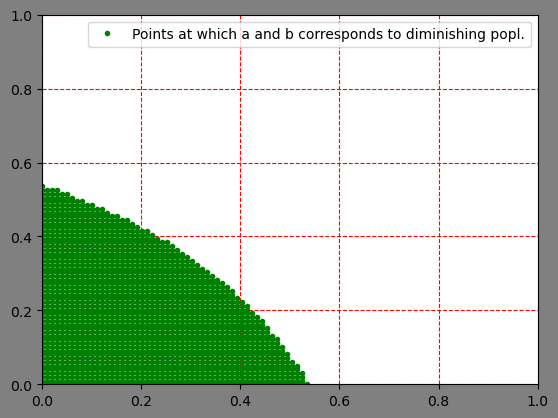

In [37]:


print("Solution for X:")
print(X)from matplotlib.patches import Patch
P = np.array([
    [0.35, 0, 0, 0, 1, 0],
    [0.16, 0.22, 0, 0, 0, 0],
    [0, 0.37, 0.457, 0, 0, 0],
    [0, 0, 0, 0, 2, 0],
    [0, 0, 0, 0.23, 0, 0],
    [0, 0, 0, 0, 0.4, 0.7]
])


a = np.linspace(0, 1, 100)
b = np.linspace(0, 1, 100)


solMat = np.zeros((100,100))

apoints=[]
bpoints=[]

for i in range(len(a)):
    for j in range(len(b)):
        P[3, 3] = a[i]
        P[4, 4] = b[j]
        if max(np.abs(np.linalg.eigvals(P))) < 1:
            solMat[i, j] = 1
            
            apoints.append(a[i])
            bpoints.append(b[j])

            

fig,ax=plt.subplots()
ax.plot(apoints, bpoints,"." , c='g',label='Points at which a and b corresponds to diminishing popl.' )
fig.set_facecolor('grey')
ax.grid(color='red', ls='--')
plt.legend()
plt.xlim(0, 1)
plt.ylim(0,1)
plt.show()

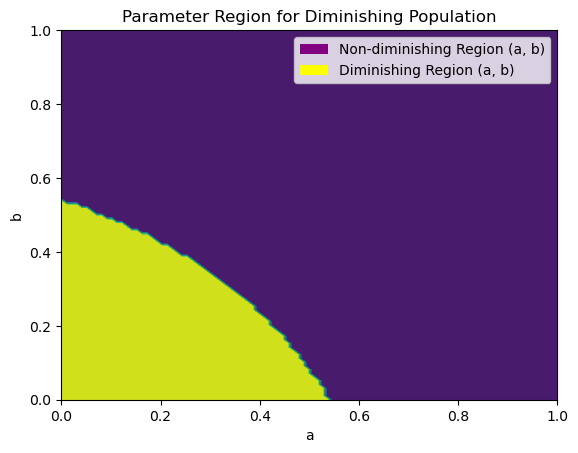

In [38]:
plt.contourf(a, b, solMat)
plt.xlabel('a')
plt.ylabel('b')
plt.title("Parameter Region for Diminishing Population")

legend_elements = [Patch(facecolor='purple', label='Non-diminishing Region (a, b)'),
                  Patch(facecolor='yellow', label='Diminishing Region (a, b)')]

plt.legend(handles=legend_elements, loc='upper right')
plt.show()

Enter for the number of years you want the prediction.50
QUESTION NUMBER 1:
 [[2.56569898]
 [0.56651844]
 [0.42986522]
 [5.60249498]
 [1.52562157]
 [2.49465775]]

QUESTION NUMBER 2(i):

the percent of female juvenile population is 42.49189058826642 


QUESTION 2(ii) OF PLOTTING GRAPH BETWEEN LOG OF POPULATION VS TIME:



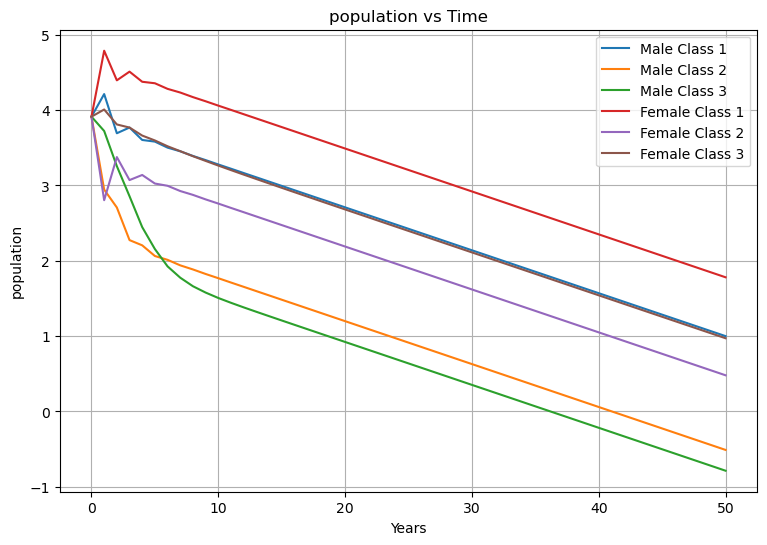

In [39]:
P1=7/20
P2=11/50
P3=457/1000
P1f=0.4
P2f=0.1
P3f=7/10
M12=4/25
M23=37/100
M12f=23/100
M23f=2/5
F2m=1
F2f=2
m1=np.array([P1,0,0,0,F2m,0])
m2=np.array([M12,P2 ,0,0,0,0])
m3=np.array([0,M23,P3,0,0,0])
f1=np.array([0,0,0,P1f,F2f,0])
f2=np.array([0,0,0,M12f,P2f,0])
f3=np.array([0,0,0,0,M23f,P3f])
Les2=np.array([m1,
  m2,
  m3,
  f1,
  f2,
  f3])
k=int(input("Enter for the number of years you want the prediction."))
Z=np.array([[k],
             [k],
             [k],
             [k],
             [k],
             [k]])
male_age_groups = [[], [], []]
female_age_groups = [[], [], []]
for i in range(k+1):
    male_age_groups[0].append(np.log(Z[0][0]))
    male_age_groups[1].append(np.log(Z[1][0]))
    male_age_groups[2].append(np.log(Z[2][0]))
    female_age_groups[0].append(np.log(Z[3][0]))
    female_age_groups[1].append(np.log(Z[4][0]))
    female_age_groups[2].append(np.log(Z[5][0]))
    
    Z=np.matmul(Les2,Z)
   
print("QUESTION NUMBER 1:\n",Z)

p= Z[3,0]/(Z[0,0]+Z[1,0]+Z[2,0]+Z[3,0]+Z[4,0]+Z[5,0])
z= p*100
print("\nQUESTION NUMBER 2(i):\n")
print("the percent of female juvenile population is",z,"\n")
   

years = list(range(k+1))


plt.figure(figsize=(9, 6))
for i in range(3):
    plt.plot(years, male_age_groups[i], label=f'Male Class {i+1}')
for i in range(3):
    plt.plot(years, female_age_groups[i], label=f'Female Class {i+1}')
plt.xlabel('Years')
plt.ylabel('population')
plt.title('population vs Time')
plt.legend()
plt.grid(True)
print("\nQUESTION 2(ii) OF PLOTTING GRAPH BETWEEN LOG OF POPULATION VS TIME:\n")
plt.show()